# 02.4 Overall Health by State - Temporal Analysis

1. Imports and display options
1. Data prep
1. Temporal analyses
1. Conclusion

## 1. Imports and display options

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\Documents\Data Analyses\BRFSS'

In [3]:
#Importing products.csv to df_prods
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'BRFSS Overall Health by State TABLEAU.pkl'))

In [4]:
#Checking df

df.shape

(385, 35)

In [5]:
#Checking df

df.head()

,location,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,...,Vegetables eaten: Daily,Vegetables eaten: Not daily,Aerobic activity per week: Over 150 min,Aerobic activity per week: Under 150 min,Met physical activity guidelines: Yes,Met physical activity guidelines: No,Strength training: 2x+ per week,Strength training: 1x- per week,Physically active in last month: Yes,Physically active in last month: No
0,Alabama,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,...,72.2,27.8,44.6,55.4,16.7,83.3,25.8,74.2,68.1,31.9
1,Alabama,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6,29.4
2,Alabama,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,...,80.7,19.3,42.8,57.2,16.1,83.9,26.0,74.0,68.0,32.0
3,Alabama,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3,30.7
4,Alabama,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,...,77.7,22.3,44.8,55.2,17.6,82.4,29.2,70.8,68.5,31.5


In [6]:
#Adjusting display settings

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

%matplotlib inline
sns.set()

# 2. Data prep

In [7]:
# Getting column names

df.columns

Index(['location', 'year', 'BMI: Obese (BMI 30.0 - 99.8)',
       'BMI: Overweight (BMI 25.0-29.9)', 'BMI: Normal Weight (BMI 18.5-24.9)',
       'BMI: Underweight (BMI 12.0-18.4)', 'General health: Excellent',
       'General health: Very good', 'General health: Good',
       'General health: Fair', 'General health: Poor',
       'Health status: Good or Better', 'Health status: Fair or Poor',
       'Doc visit: Past year', 'Doc visit: Past 2 years',
       'Doc visit: Past 5 years', 'Doc visit: 5+ years ago',
       'Doc visit: Never', 'Concentrate, remember, decide: Difficult',
       'Concentrate, remember, decide: Not difficult',
       'Bad mental health days: 0', 'Bad mental health days: 1-13',
       'Bad mental health days: 14+', 'Fruit eaten: Daily',
       'Fruit eaten: Not daily', 'Vegetables eaten: Daily',
       'Vegetables eaten: Not daily',
       'Aerobic activity per week: Over 150 min',
       'Aerobic activity per week: Under 150 min',
       'Met physical activity g

In [8]:
# Dropping calculated health statuses and negative response to binary question pairs, 
# i.e.: keeping 'Fruit eaten: Daily' and dropping 'Fruit eaten: Not daily'.

df.drop(columns=['Health status: Good or Better',
                 'Health status: Fair or Poor',
                 'Concentrate, remember, decide: Not difficult',
                 'Fruit eaten: Not daily',
                 'Vegetables eaten: Not daily',
                 'Aerobic activity per week: Under 150 min',
                 'Met physical activity guidelines: No',
                 'Strength training: 1x- per week',
                 'Physically active in last month: No'], inplace=True)

In [9]:
#Checking changes

df.head()

,location,year,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
0,Alabama,2015,35.6,33.0,28.9,2.4,16.2,29.1,32.5,15.2,...,15.0,NaN,NaN,NaN,51.7,72.2,44.6,16.7,25.8,68.1
1,Alabama,2016,35.7,33.8,28.4,2.1,15.2,29.8,32.5,15.7,...,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.6
2,Alabama,2017,36.3,33.9,28.5,1.3,15.4,28.2,33.1,16.2,...,15.8,NaN,NaN,NaN,55.2,80.7,42.8,16.1,26.0,68.0
3,Alabama,2018,36.2,33.4,28.4,2.0,14.5,28.6,34.0,15.7,...,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.3
4,Alabama,2019,36.1,34.2,27.5,2.2,15.4,29.5,32.4,16.2,...,16.7,58.0,24.5,17.5,53.9,77.7,44.8,17.6,29.2,68.5


In [10]:
# Grouping data by year using mean aggregation for the temporarl analysis, dropped location.

year = df.drop(columns=['location']).groupby(['year']).mean()
year

,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4),General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor,Doc visit: Past year,...,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+,Fruit eaten: Daily,Vegetables eaten: Daily,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
year,,,,,,,,,,,,,,,,,,,,,
2015,29.345455,35.554545,33.321818,1.769091,18.690909,32.701818,31.320000,12.750909,4.520000,69.618182,...,10.290909,NaN,NaN,NaN,58.932727,77.476364,51.240000,20.336364,29.832727,73.723636
2016,29.835714,35.294643,33.010714,1.881481,18.341071,32.376786,31.639286,13.016071,4.650000,70.710714,...,10.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.083929
2017,30.730909,35.140000,32.307273,1.836364,17.721818,32.000000,31.961818,13.465455,4.860000,70.061818,...,11.432727,NaN,NaN,NaN,62.985455,81.340000,49.940000,20.016364,29.887273,72.861818
2018,31.285455,34.820000,32.012727,1.854545,17.701818,32.098182,31.969091,13.410909,4.807273,76.349091,...,11.681818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.480000
2019,32.066667,34.801852,31.248148,1.857407,17.092593,32.287037,32.262963,13.731481,4.666667,76.583333,...,12.151852,61.387037,24.766667,13.837037,59.816667,79.422222,50.159259,22.387037,34.644444,73.342593
2020,32.076364,34.798182,31.316364,1.807407,21.961818,33.938182,29.647273,11.027273,3.409091,74.894545,...,10.840000,62.301818,24.100000,13.538182,NaN,NaN,NaN,NaN,NaN,76.501818
2021,33.556364,34.196364,30.374545,1.859259,19.207273,33.112727,31.605455,12.181818,3.872727,74.167273,...,12.700000,59.663636,25.596364,14.743636,59.258182,79.421818,NaN,NaN,NaN,75.821818


# 3. Temporal analyses

### BMI

In [11]:
# Making BMI dataframe

to_plot = year.iloc[:,0:4]
to_plot

,BMI: Obese (BMI 30.0 - 99.8),BMI: Overweight (BMI 25.0-29.9),BMI: Normal Weight (BMI 18.5-24.9),BMI: Underweight (BMI 12.0-18.4)
year,,,,
2015,29.345455,35.554545,33.321818,1.769091
2016,29.835714,35.294643,33.010714,1.881481
2017,30.730909,35.140000,32.307273,1.836364
2018,31.285455,34.820000,32.012727,1.854545
2019,32.066667,34.801852,31.248148,1.857407
2020,32.076364,34.798182,31.316364,1.807407
2021,33.556364,34.196364,30.374545,1.859259


<AxesSubplot:xlabel='year'>

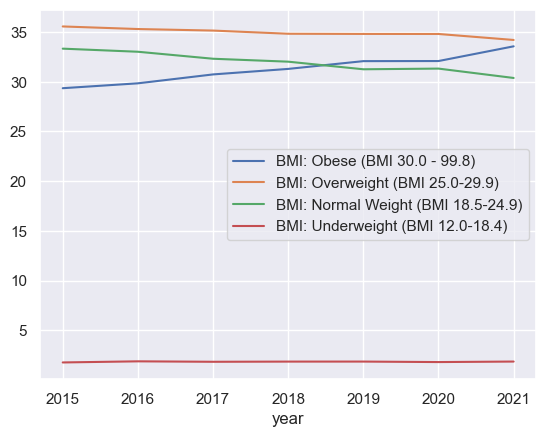

In [12]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    <b>BMI: Obese</b> has been increasing over the last six years with a larger-than-usual increase from 2020 to 2021.<br>
    <b>BMI: Overweight</b> has been slightly decreasing over the last six years with a larger-than-usual decrease from 2020 to 2021.<br>
    <b>BMI: Normal weight</b> has been decreasing over the last six years with a larger-than-usual decrease from 2020 to 2021.<br>
    <b>BMI: Underweight</b> has remained constant.<br><br>
    <b>Obesity is on the rise</b> while normal weightedness and overweightedness are in decline.<br>
    <b>Obese could become the predominant BMI category by 2022.</b>
   </div>

### General health

In [13]:
# Making general health dataframe

to_plot = year.iloc[:,4:9]
to_plot

,General health: Excellent,General health: Very good,General health: Good,General health: Fair,General health: Poor
year,,,,,
2015,18.690909,32.701818,31.320000,12.750909,4.520000
2016,18.341071,32.376786,31.639286,13.016071,4.650000
2017,17.721818,32.000000,31.961818,13.465455,4.860000
2018,17.701818,32.098182,31.969091,13.410909,4.807273
2019,17.092593,32.287037,32.262963,13.731481,4.666667
2020,21.961818,33.938182,29.647273,11.027273,3.409091
2021,19.207273,33.112727,31.605455,12.181818,3.872727


<AxesSubplot:xlabel='year'>

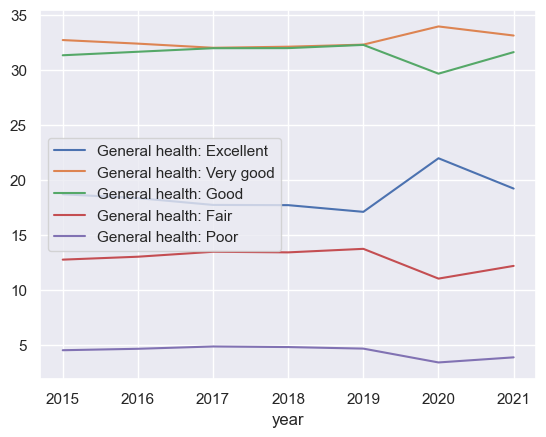

In [14]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    <b>60% - 65% of people report experiencing good or very good general health.</b><br>
    About 20% of people report experiencing excellent health.<br>
    Less than 5% of people report experincing poor health.<br><br>
     General health: <b>Excellent and Very good</b> had been decreasing from 2015 to 2019, increased from 2019 to 2020, and then declined again.<br>
    General health: <b>Good, Fair, and Poor</b> had been increasing from 2015 to 2019, decreased from 2019 to 2020, and then increased again.<br><br>
    <b>COVID-19 seems to have increased people's outlook of their health.</b>
   </div>

### Doctor visits

In [15]:
# Making doctor visits dataframe

to_plot = year.iloc[:,9:14]
to_plot

,Doc visit: Past year,Doc visit: Past 2 years,Doc visit: Past 5 years,Doc visit: 5+ years ago,Doc visit: Never
year,,,,,
2015,69.618182,13.147273,8.278182,7.874545,1.190000
2016,70.710714,12.794643,7.733929,7.653571,1.183333
2017,70.061818,12.929091,8.158182,7.661818,1.239216
2018,76.349091,10.981818,6.198182,5.750909,0.784444
2019,76.583333,10.887037,6.196296,5.570370,0.826667
2020,74.894545,12.863636,6.185455,5.438182,0.708889
2021,74.167273,13.369091,6.543636,5.251852,0.769767


<AxesSubplot:xlabel='year'>

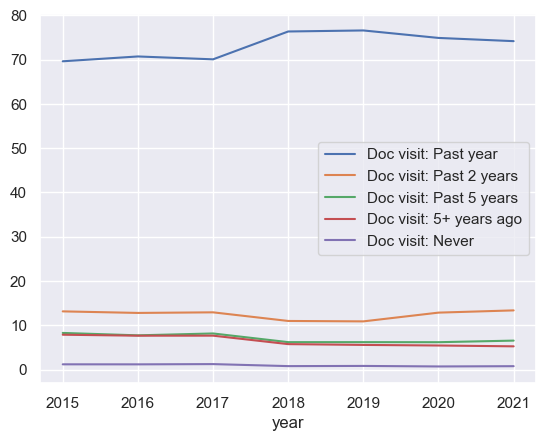

In [16]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    <b>70% of respondants see a doctor at least once a year.</b><br><br>
    Doc visit: <b>Past year</b> saw a 6% gain from 2017 to 2018, plateaued, then began gently declining in 2020.<br>
    Doc visit: <b>Past 2 years</b> seems to have an inverse relationship to Doc visit: Past year.<br>
    Doc visit: <b>Past 5 years, 5+ years ago, and Never</b> have been marginally decreasing over the past six years and also saw a decrease when Doc visit: Past year increased in from 2017 to 2018.<br><br>
    <b>Some event, wide-spread illness, or initiatve caused likely caused increased doctor visits in 2017.</b>
   </div>

### Mental health

In [17]:
# Making mental health dataframe

to_plot = year.iloc[:,14:18]
to_plot

,"Concentrate, remember, decide: Difficult",Bad mental health days: 0,Bad mental health days: 1-13,Bad mental health days: 14+
year,,,,
2015,10.290909,NaN,NaN,NaN
2016,10.750000,NaN,NaN,NaN
2017,11.432727,NaN,NaN,NaN
2018,11.681818,NaN,NaN,NaN
2019,12.151852,61.387037,24.766667,13.837037
2020,10.840000,62.301818,24.100000,13.538182
2021,12.700000,59.663636,25.596364,14.743636


<AxesSubplot:xlabel='year'>

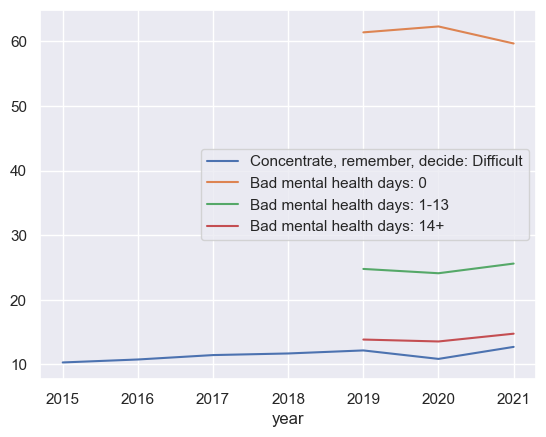

In [18]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    <b>Bad mental health days</b> categories lack sufficient records to make a time-series analysis.<br>
    About 0.5% more people have been having trouble concentrating, remembering, and deciding each year.<br>
    <b>COVID-19 improved 1.3% of respondants' abilities to concentrate, remember, and decide.</b>
   </div>

### Dietary health

In [19]:
# Making dietary health dataframe

to_plot = year.iloc[:,18:20]
to_plot.fillna(method='pad', inplace=True)
to_plot

C:\Users\theva\AppData\Local\Temp\ipykernel_19728\2785714518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot.fillna(method='pad', inplace=True)


,Fruit eaten: Daily,Vegetables eaten: Daily
year,,
2015,58.932727,77.476364
2016,58.932727,77.476364
2017,62.985455,81.340000
2018,62.985455,81.340000
2019,59.816667,79.422222
2020,59.816667,79.422222
2021,59.258182,79.421818


<AxesSubplot:xlabel='year'>

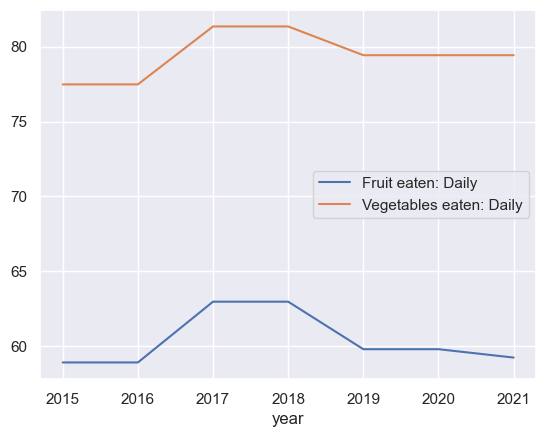

In [20]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    Approximately <b>80% of all respondants eat vegetables daily and 60% eat fruit daily.</b><br>
    Both categories saw a 4% rise from 2015 to 2017 and then a 2%-3% drop from 2017 to 2019.<br>
    COVID-19 seems to have had little impact on respondants' fruit and vegetable consumption.<br><br>
    <em>Dietary health questions only appear in the survey semi-annually. Missing entries have been copied from the previous year (i.e., 2016 has duplicated data from 2015).</em>
   </div>

### Physical activity

In [21]:
# Making physical activity dataframe

to_plot = year.iloc[:,20:]
to_plot.fillna(method='pad', inplace=True)
to_plot

C:\Users\theva\AppData\Local\Temp\ipykernel_19728\1997277853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot.fillna(method='pad', inplace=True)


,Aerobic activity per week: Over 150 min,Met physical activity guidelines: Yes,Strength training: 2x+ per week,Physically active in last month: Yes
year,,,,
2015,51.240000,20.336364,29.832727,73.723636
2016,51.240000,20.336364,29.832727,76.083929
2017,49.940000,20.016364,29.887273,72.861818
2018,49.940000,20.016364,29.887273,75.480000
2019,50.159259,22.387037,34.644444,73.342593
2020,50.159259,22.387037,34.644444,76.501818
2021,50.159259,22.387037,34.644444,75.821818


<AxesSubplot:xlabel='year'>

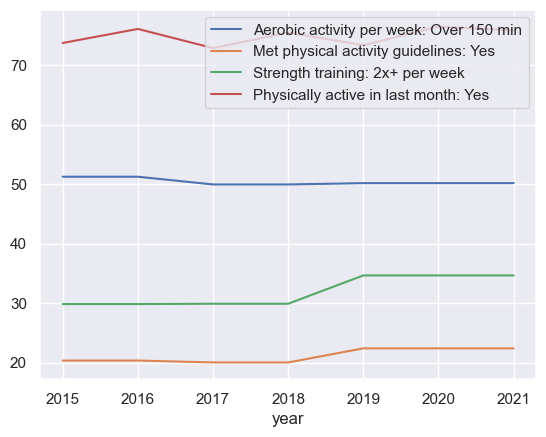

In [22]:
#Plotting to_plot

to_plot.plot.line()

<div class='alert alert-block alert-info'>
    <b>70% of respondants engage in physical activity at least once a month and 50% excede 150 minutes of aerobic activity per week!</b><br>
    30% of respondants strength train 2 or more times per week.<br>
    <b>Only 20% of respondants met physical activity guidelines.</b><br><br>
    <b>Physically active in the last month</b> has a bi-annual high/low trend (i.e., 2015 is low, 2016 is high, 2017 is low, etc). While a 2%-3% change occured each year, 2021 only decreased 0.7% - possibly indicating that <b>more people engaged in regular activity durin the COVID-19 pandemic.</b><br>
    <b>Strength training: 2x+ per week</b> experienced a 5% increase from 2017 to 2019.<br><br>
    <em>Aerobic activity per week: over 150 min, Met physical activity guidelines: Yes, and Strength training: 2x+ per week questions only appear in the 2015, 2017, and 2019 surveys. Missing entries have been copied from the previous year (i.e., 2016 has duplicated data from 2015).</em>
   </div>

# 4. Conclusion

<div class='alert alert-block alert-warning'>
    <li><b>Obesity is on the rise</b> with overweight and normal weight BMIs on the decline.<br>
    <li>2015-2019 saw a trend of more people experiencing good and fair general health with <b>fewer experiencing excellent general health.</b><br>
    <li><b>Over 70% of Americans see a doctor every year.</b> In 2018 6% more Americans - approximately 20 million people - saw a doctor than the year before.<br>
    <li>Less than 1% of Americans have never seen a doctor.<br>
    <li>Each year, about 0.5% <b>more people have been having trouble concentrating, remembering, and deciding.</b><br>
    <li><b>80% of all respondants eat vegetables daily and 60% eat fruit daily.</b> Daily fruit and vegetable consumption saw a 4% rise from 2015 to 2017 and then a 2%-3% drop from 2017 to 2019.<br>
    <li><b>70% of respondants engage in physical activity at least once a month, 50% excede 150 minutes of aerobic activity per week,</b> and 30% of respondants strength train 2 or more times per week.<br>
    <br>
    <li><b>COVID-19 improved general health</b> (or at least our perception of it). 2020 saw a strong increase in the percent of respondants reporting excellent and very good general health and a decrease in good, fair, and poor general health.<br>
    <li><b>COVID-19 improved mental health.</b> 2020 saw a 1.3% reduction in respondants experiencing difficulty concentrating, remembering, and deciding.<br>
    <li><b>COVID-19 improved physically activity.</b> 2021 saw 2% more respondents than expected engage in physical activity at least once a month.    
   </div>

<div class='alert alert-block alert-success'>
    <b>Next step:</b> Conduct linear regressions to validate correlation findings and compare to temporal anlysis.
   </div>

In [23]:
# reset plot defaults

sns.reset_defaults()